<a href="https://colab.research.google.com/github/AdityaS-20A2HP445/MLAP2021/blob/main/Clustering/AdityaSaxena_20A2HP445.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
import numpy as np
import pandas as pd 

In [27]:
titanic_data_df = pd.read_csv("https://raw.githubusercontent.com/AdityaS-20A2HP445/MLAP2021/main/Clustering/titanic.csv")

In [28]:
titanic_data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
titanic_data = titanic_data_df.drop(['PassengerId','Embarked','Ticket','Name'],axis =1)

In [30]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,male,22.0,1,0,7.2500,NaN
1,1,1,female,38.0,1,0,71.2833,C85
2,1,3,female,26.0,0,0,7.9250,NaN
3,1,1,female,35.0,1,0,53.1000,C123
4,0,3,male,35.0,0,0,8.0500,NaN


In [31]:
titanic_data = titanic_data.drop(['Cabin'],axis =1)

In [32]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
encode = LabelEncoder()
encoded_sex = encode.fit_transform(titanic_data.iloc[:, 2])
print(encoded_sex)

[1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0
 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0
 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0
 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1
 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0
 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1
 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1
 1 1 0 1 0 0 1 1 1 1 1 1 

In [35]:
titanic_data['Sex'] = encoded_sex
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
888,0,3,0,NaN,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


In [36]:
def clean_dataset(titanic_data):
    assert isinstance(titanic_data, pd.DataFrame), "df needs to be a pd.DataFrame"
    titanic_data.dropna(inplace=True)
    indices_to_keep = ~titanic_data.isin([np.nan, np.inf, -np.inf]).any(1)
    return titanic_data[indices_to_keep].astype(np.float64)

In [37]:
titanic_data = clean_dataset(titanic_data)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_titanic_data = scaler.fit_transform( titanic_data[['Survived',
                                                              'Pclass', 
                                                              'Sex', 
                                                              'Age',
                                                              'SibSp',
                                                              'Parch',
                                                              'Fare']] )

In [39]:
from sklearn.cluster import KMeans
clusters_new = KMeans( 3, random_state=42 )
clusters_new.fit( scaled_titanic_data )
titanic_data["clusterid_new"] = clusters_new.labels_

In [40]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid_new
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,1
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,1
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,1
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,0
...,...,...,...,...,...,...,...,...
885,0.0,3.0,0.0,39.0,0.0,5.0,29.1250,2
886,0.0,2.0,1.0,27.0,0.0,0.0,13.0000,0
887,1.0,1.0,0.0,19.0,0.0,0.0,30.0000,1
889,1.0,1.0,1.0,26.0,0.0,0.0,30.0000,1


**Finding Optimal Number of Clusters using Elbow **

In [41]:
import matplotlib.pyplot as plt

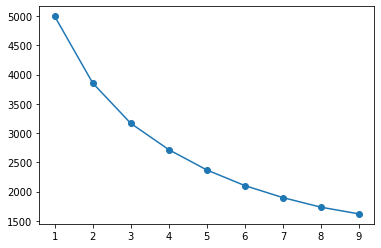

In [42]:
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( scaled_titanic_data )
  cluster_errors.append( clusters.inertia_ )

plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );

In [43]:
k = 3
clusters = KMeans( k, random_state = 42 )
clusters.fit( scaled_titanic_data )
titanic_data["clusterid"] = clusters.labels_

In [44]:
titanic_data[titanic_data.clusterid == 0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid_new,clusterid
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,0,0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,0,0
6,0.0,1.0,1.0,54.0,0.0,0.0,51.8625,0,0
12,0.0,3.0,1.0,20.0,0.0,0.0,8.0500,0,0
14,0.0,3.0,0.0,14.0,0.0,0.0,7.8542,0,0
...,...,...,...,...,...,...,...,...,...
882,0.0,3.0,0.0,22.0,0.0,0.0,10.5167,0,0
883,0.0,2.0,1.0,28.0,0.0,0.0,10.5000,0,0
884,0.0,3.0,1.0,25.0,0.0,0.0,7.0500,0,0
886,0.0,2.0,1.0,27.0,0.0,0.0,13.0000,0,0


In [45]:
titanic_data[titanic_data.clusterid == 1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid_new,clusterid
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,1,1
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,1,1
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,1,1
9,1.0,2.0,0.0,14.0,1.0,0.0,30.0708,1,1
11,1.0,1.0,0.0,58.0,0.0,0.0,26.5500,1,1
...,...,...,...,...,...,...,...,...,...
875,1.0,3.0,0.0,15.0,0.0,0.0,7.2250,1,1
879,1.0,1.0,0.0,56.0,0.0,1.0,83.1583,1,1
880,1.0,2.0,0.0,25.0,0.0,1.0,26.0000,1,1
887,1.0,1.0,0.0,19.0,0.0,0.0,30.0000,1,1


In [46]:
titanic_data[titanic_data.clusterid == 2]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid_new,clusterid
7,0.0,3.0,1.0,2.0,3.0,1.0,21.0750,2,2
8,1.0,3.0,0.0,27.0,0.0,2.0,11.1333,2,2
10,1.0,3.0,0.0,4.0,1.0,1.0,16.7000,2,2
13,0.0,3.0,1.0,39.0,1.0,5.0,31.2750,2,2
16,0.0,3.0,1.0,2.0,4.0,1.0,29.1250,2,2
...,...,...,...,...,...,...,...,...,...
850,0.0,3.0,1.0,4.0,4.0,2.0,31.2750,2,2
852,0.0,3.0,0.0,9.0,1.0,1.0,15.2458,2,2
858,1.0,3.0,0.0,24.0,0.0,3.0,19.2583,2,2
869,1.0,3.0,1.0,4.0,1.0,1.0,11.1333,2,2


In [47]:
titanic_data[titanic_data.clusterid == 3]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid_new,clusterid


In [48]:
titanic_data.groupby( 'clusterid' )['Age','Fare'].agg( ["mean",'std'] ).reset_index()

clusterid        Age                  Fare           
                  mean        std       mean        std
0         0  32.159548  12.742471  17.737655  19.456354
1         1  32.886574  13.168933  67.367942  80.815509
2         2  13.021700  12.828514  31.608208  31.177386